In [1]:
from torch.distributions.uniform import Uniform

from main import train_and_eval, train_loader, test_loader

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch

### Visualize training and testing data

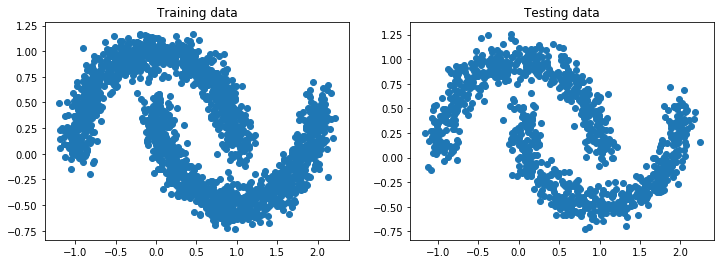

In [2]:
_, axes = plt.subplots(1,2,figsize=(12,4))
x,y = train_loader.dataset.array[:,0], train_loader.dataset.array[:,1]
_ = axes[0].scatter(x,y)
_ = axes[0].set_title('Training data')

x,y = test_loader.dataset.array[:,0], test_loader.dataset.array[:,1]
_ = axes[1].scatter(x,y)
_ = axes[1].set_title('Testing data')

### Train the flow model

In [3]:
low = torch.FloatTensor([0, 0])
high = torch.FloatTensor([1, 1])
target_distribution = Uniform(low, high)
flow, train_losses, test_losses = train_and_eval(100, 5e-3, train_loader, test_loader, target_distribution)

### View the losses

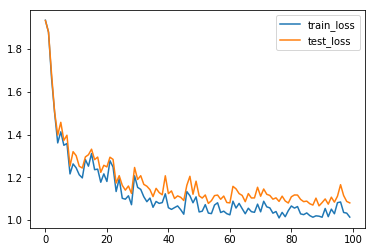

In [4]:
_ = plt.plot(train_losses, label='train_loss')
_ = plt.plot(test_losses, label='test_loss')
_ = plt.legend()

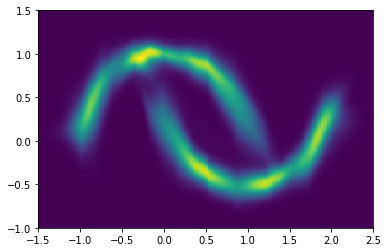

In [5]:
xs = np.linspace(-1.5,2.5,200)
ys = np.linspace(-1,1.5,200)
xs, ys = np.meshgrid(xs, ys)
x = np.stack([xs, ys], axis=2).reshape(-1,2)
with torch.no_grad():
    z, dz_by_dx = flow(torch.FloatTensor(x))
    px = (target_distribution.log_prob(z) + dz_by_dx.log())
    px = px.sum(1).exp()
    px = px.cpu().numpy().reshape(200,200)
    plt.pcolor(xs,ys,px)

### Empirical distirbution of `z`

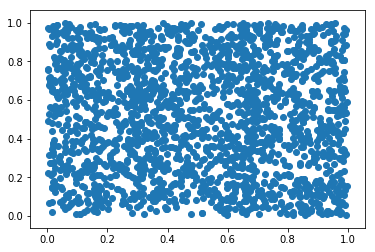

In [6]:
with torch.no_grad():
    z, _ = flow(torch.FloatTensor(train_loader.dataset.array))
    z = z.cpu().numpy()
    plt.scatter(z[:,0], z[:,1])